In [2]:
library(karyoploteR)
library(rtracklayer)
library(readr)
library(dplyr)

In [ ]:
#fai <- read_tsv(snakemake@params[[1]], col_names = FALSE)

In [ ]:
fai <- read_tsv("/home5/attilio/Tarcisio/smallrna_rhodnius_2023/resources/genome/Rhodnius_prolixus-3.0.3_HiC.fasta.fai", 
                col_names = FALSE)

In [8]:
fai <- fai %>%  mutate(s=(0*X2)+1) %>% select(X1,s,X2)

custom_genome <- toGRanges(fai %>% as.data.frame)
custom_genome[c(1:11),]

GRanges object with 11 ranges and 0 metadata columns:
            seqnames     ranges strand
               <Rle>  <IRanges>  <Rle>
   1  HiC_scaffold_1 1-47232656      *
   2  HiC_scaffold_2 1-45634076      *
   3  HiC_scaffold_3 1-48117738      *
   4  HiC_scaffold_4 1-38674490      *
   5  HiC_scaffold_5 1-45773795      *
   6  HiC_scaffold_6 1-69096158      *
   7  HiC_scaffold_7 1-56613900      *
   8  HiC_scaffold_8 1-64323523      *
   9  HiC_scaffold_9 1-45655803      *
  10 HiC_scaffold_10 1-45755482      *
  11 HiC_scaffold_11 1-55035022      *
  -------
  seqinfo: 17755 sequences from an unspecified genome; no seqlengths

In [9]:
cluster_files <- c(
    "pvs" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/pvs.clusters.nomir.bed",
    "egg" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/egg.clusters.nomir.bed",
    "emb" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/emb.clusters.nomir.bed",
    "nym" = "/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/nym.clusters.nomir.bed"
)

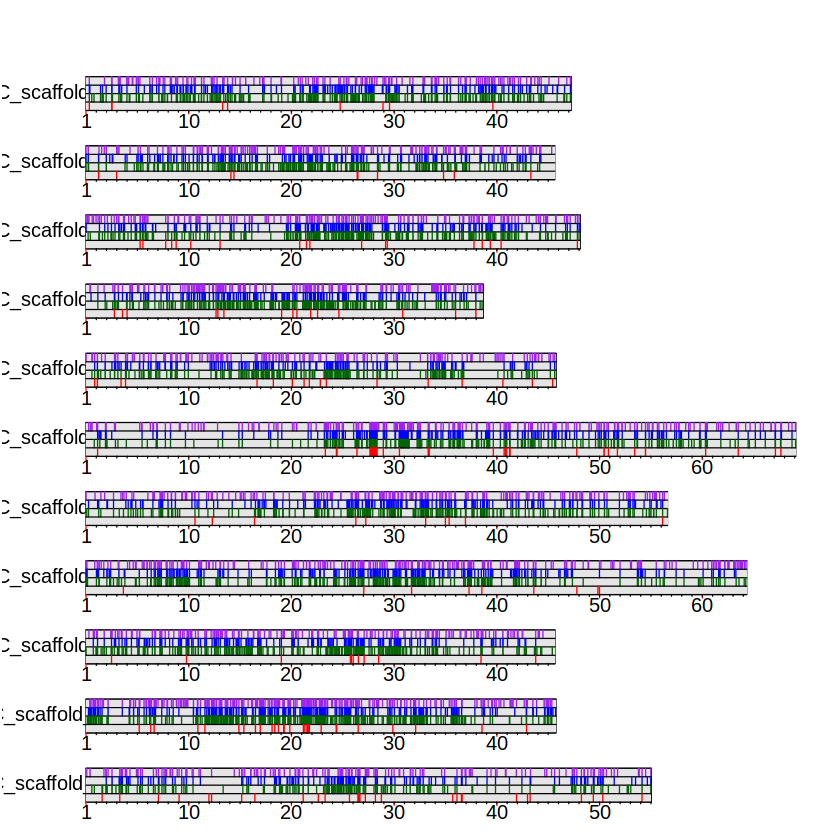

In [11]:
# cluster_files <- snakemake@input

clusters <- lapply(cluster_files, import)

plot.params <- getDefaultPlotParams(plot.type=6)
plot.params$ideogramheight <- 100
plot.params$data1outmargin <- 100


u <- 0.25

bg <- 0 + (4 * u)
p <- 0 + (3 * u) 
g <- 0 + (2 * u)
m <- 0 + (1 * u)
n <- 0 + (0 * u)

# png(snakemake@output[[1]], width=1000, height = 800)
kp <- plotKaryotype(genome = custom_genome, chromosomes = fai$X1[c(1:11)], plot.type = 6, plot.params=plot.params)
kpDataBackground(kp, color = "grey90")
kpAbline(kp, h=p+u)
kpPlotRegions(kp, data=clusters[["pvs"]], r0=p, r1=p+u, col = "purple")
kpAbline(kp, h=p)
kpPlotRegions(kp, data=clusters[["egg"]], r0=g, r1=g+u, col = "blue")
kpAbline(kp, h=g)
kpPlotRegions(kp, data=clusters[["emb"]], r0=m, r1=m+u, col = "darkgreen")
kpAbline(kp, h=m)
kpPlotRegions(kp, data=clusters[["nym"]], r0=n, r1=n+u, col = "red")
kpAbline(kp, h=n)
kpAddBaseNumbers(kp, tick.dist = 10000000, tick.len = 10, tick.col="red", cex=1,
                 minor.tick.dist = 1000000, minor.tick.len = 5, minor.tick.col = "black")
# dev.off()

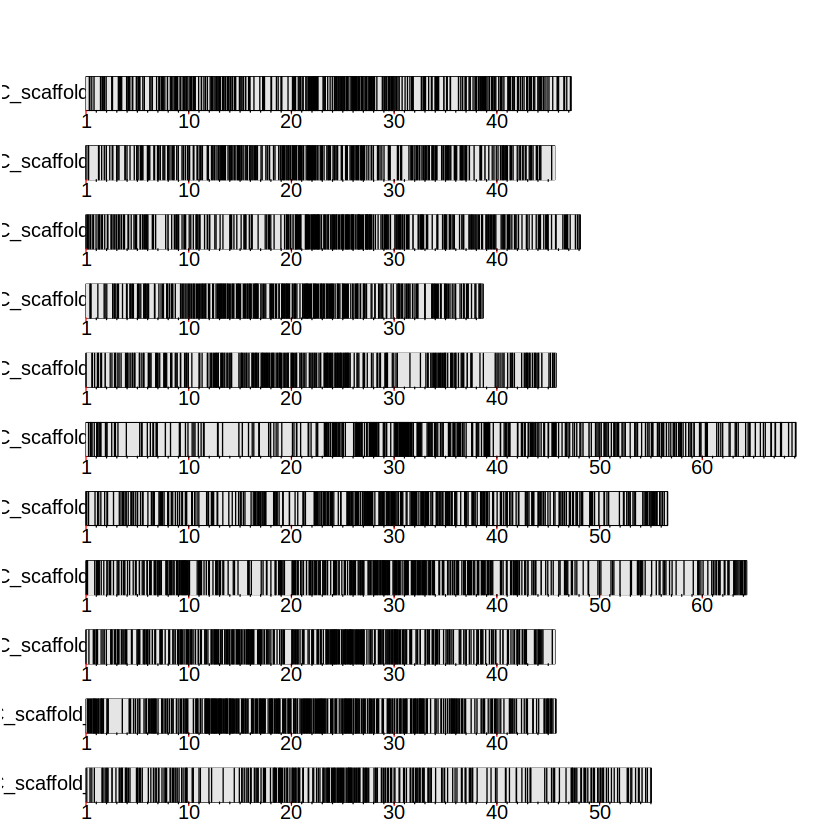

In [12]:

all_clusters <- import("/home5/attilio/Tarcisio/smallrna_rhodnius_2023/results/clusters/clusters.bed")


plot.params <- getDefaultPlotParams(plot.type=6)
plot.params$ideogramheight <- 100
plot.params$data1outmargin <- 100

kp <- plotKaryotype(genome = custom_genome, chromosomes = fai$X1[c(1:11)], plot.type = 6, plot.params=plot.params)
kpDataBackground(kp, color = "grey90")
kpPlotRegions(kp, data=clusters)
kpAddBaseNumbers(kp, tick.dist = 10000000, tick.len = 10, tick.col="red", cex=1,
                 minor.tick.dist = 1000000, minor.tick.len = 5, minor.tick.col = "black")
# dev.off()